In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv('semi_age_results_stacked.csv', sep=';')
results = results[['Name', 'Amount', 'test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5']]

/Users/nikitaovsov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


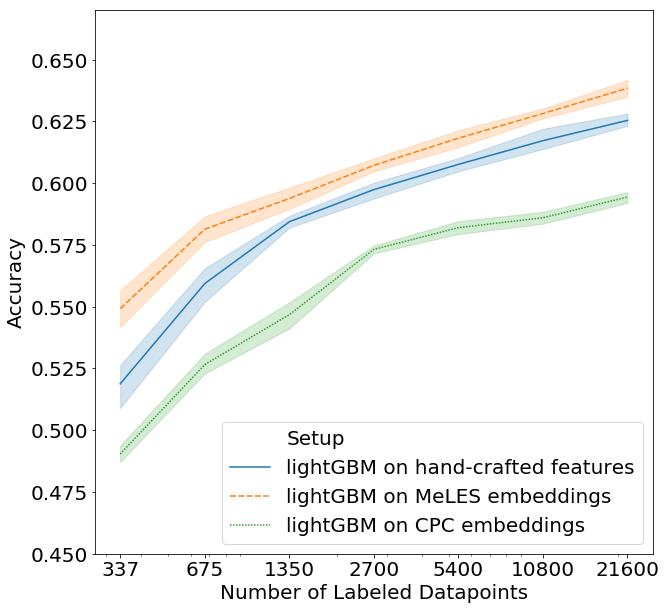

In [4]:
results_melted = results[[(x in set(['lgb_baseline', 'lgb_embeds','lgb_cpc embeds'])) for x in results['Name']]] \
    .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
results_melted.rename(columns={'value':'Accuracy', 'Name':'Setup'}, inplace=True)

results_melted['Setup'] = results_melted['Setup'].map({
    'lgb_baseline': 'lightGBM on hand-crafted features',
    'lgb_embeds': 'lightGBM on MeLES embeddings',
    'lgb_cpc embeds': 'lightGBM on CPC embeddings',
})

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    ax = sns.lineplot(
        x="Amount",
        y="Accuracy",
        data=results_melted,
        hue='Setup',
        style='Setup',
        legend='full',
    )
    
    ax.set_xlabel('Number of Labeled Datapoints')
    ax.set_xscale('log')

    ax.set(ylim=(0.45, 0.67))
    ax.set_facecolor('white')

    x_ticks = results_melted['Amount'].unique()
    plt.xticks(x_ticks,(str(x) for x in x_ticks))
    #plt.grid(color='white')
    
    mpl.pyplot.savefig('figures/ss_age_0.png', bbox_inches='tight')


/Users/nikitaovsov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


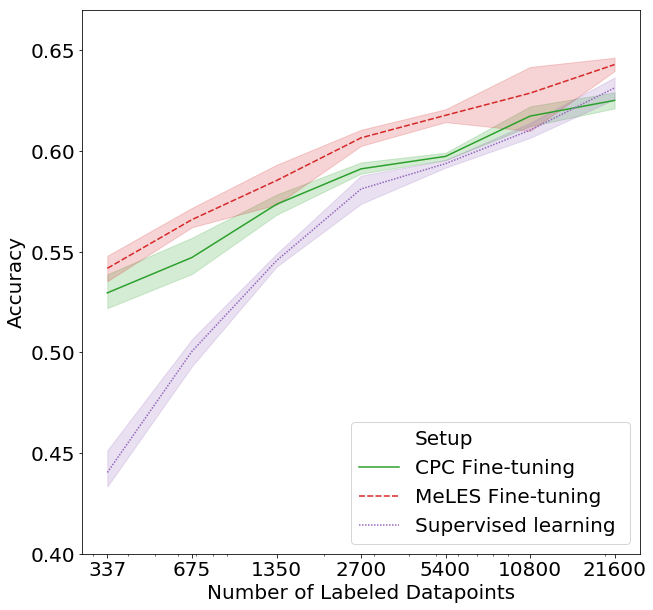

In [5]:
results_melted = results[[(x in set(['fine tuning', 'fine tuning cpc','Target labeling'])) for x in results['Name']]] \
    .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
results_melted.rename(columns={'value':'Accuracy', 'Name':'Setup'}, inplace=True)

results_melted['Setup'] = results_melted['Setup'].map({
    'fine tuning': 'MeLES Fine-tuning',
    'fine tuning cpc': 'CPC Fine-tuning',
    'Target labeling': 'Supervised learning '
})

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    ax = sns.lineplot(
        x="Amount",
        y="Accuracy",
        data=results_melted,
        hue='Setup',
        style='Setup',
        legend='full',
        palette=sns.color_palette()[2:5]
    )
    
    ax.set_xlabel('Number of Labeled Datapoints')
    ax.set_xscale('log')
    
    ax.set(ylim=(0.4, 0.67))
    ax.set_facecolor('white')
    
    x_ticks = results_melted['Amount'].unique()
    plt.xticks(x_ticks,(str(x) for x in x_ticks))
    #plt.grid(color='white')
    
    mpl.pyplot.savefig('figures/ss_age_1_wopl.png', bbox_inches='tight')

In [6]:
results = pd.read_csv('semi_gender_results_stacked.csv', sep=';')
results = results[['Name', 'Amount', 'test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5']]

/Users/nikitaovsov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


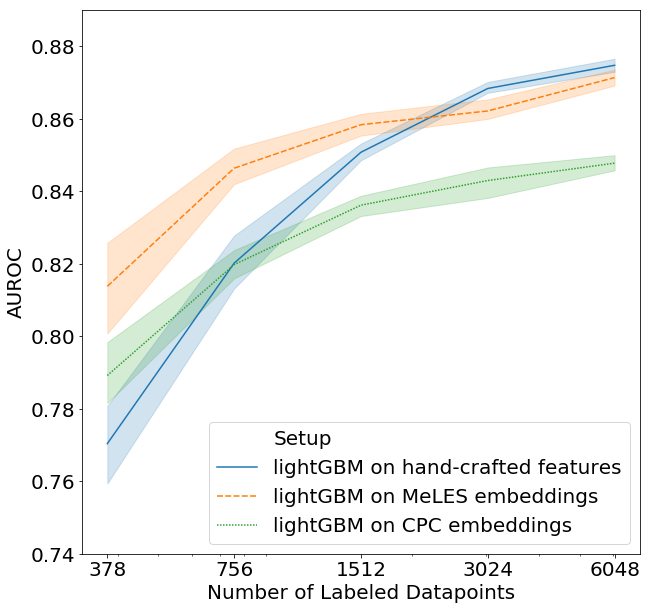

In [7]:
results_melted = results[[(x in set(['lgb_baseline', 'lgb_embeds','lgb_cpc embeds'])) for x in results['Name']]] \
    .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
results_melted.rename(columns={'value':'AUROC', 'Name':'Setup'}, inplace=True)

results_melted['Setup'] = results_melted['Setup'].map({
    'lgb_baseline': 'lightGBM on hand-crafted features',
    'lgb_embeds': 'lightGBM on MeLES embeddings',
    'lgb_cpc embeds': 'lightGBM on CPC embeddings',
})

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    ax = sns.lineplot(
        x="Amount",
        y="AUROC",
        data=results_melted,
        hue='Setup',
        style='Setup',
        legend='full',
    )
    
    ax.set_xlabel('Number of Labeled Datapoints')
    ax.set_xscale('log')

    ax.set(ylim=(0.74, 0.89))
    ax.set_facecolor('white')

    x_ticks = results_melted['Amount'].unique()
    plt.xticks(x_ticks,(str(x) for x in x_ticks))
    #plt.grid(color='white')
    
    mpl.pyplot.savefig('figures/ss_gen_0.png', bbox_inches='tight')



/Users/nikitaovsov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


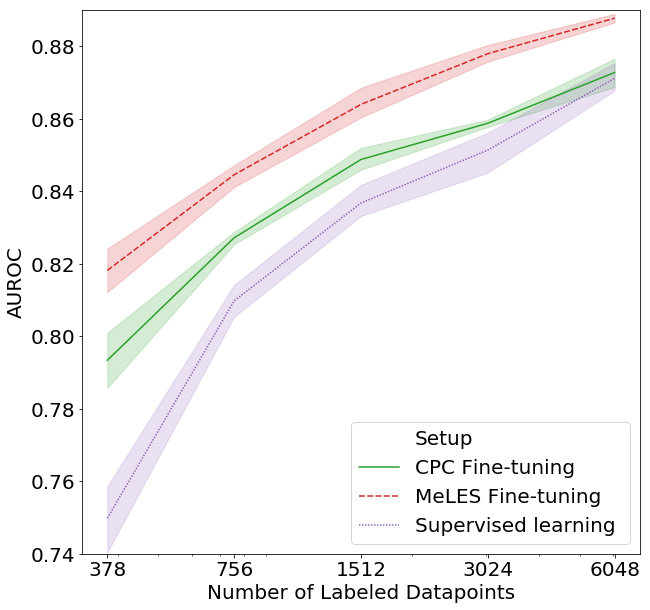

In [8]:
results_melted = results[[(x in set(['fine tuning', 'fine tuning cpc','Target labeling'])) for x in results['Name']]] \
    .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
results_melted.rename(columns={'value':'AUROC', 'Name':'Setup'}, inplace=True)

results_melted['Setup'] = results_melted['Setup'].map({
    'fine tuning': 'MeLES Fine-tuning',
    'fine tuning cpc': 'CPC Fine-tuning',
    'Target labeling': 'Supervised learning '
})

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    ax = sns.lineplot(
        x="Amount",
        y="AUROC",
        data=results_melted,
        hue='Setup',
        style='Setup',
        legend='full',
        palette=sns.color_palette()[2:5]
    )
    
    ax.set_xlabel('Number of Labeled Datapoints')
    ax.set_xscale('log')
    
    ax.set(ylim=(0.74, 0.89))
    ax.set_facecolor('white')
    
    x_ticks = results_melted['Amount'].unique()
    plt.xticks(x_ticks,(str(x) for x in x_ticks))
    #plt.grid(color='white')
    
    mpl.pyplot.savefig('figures/ss_gen_1.png', bbox_inches='tight')